In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt;import seaborn as sns

In [4]:
n = 100      # Number of trials
p = 0.5      # Probability of success
k = 24       # Number of positive outcomes

# Calculate the probability
probability = stats.binom.cdf(k, n, p)
probability

9.050013106514627e-08

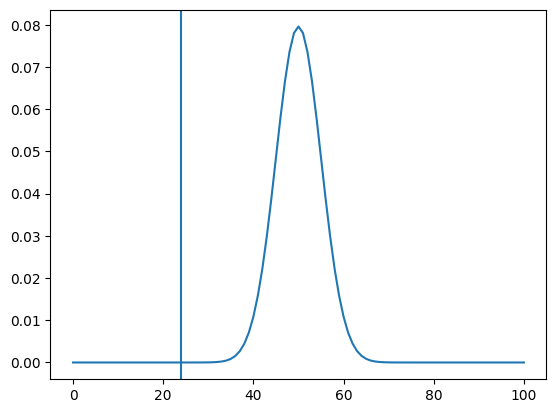

In [17]:
x = np.arange(0, n + 1)
# stats.binom.pmf(n=100,p=0.5)
pmf = stats.binom.pmf(x, n, p)
sns.lineplot(x=x,y=pmf)
plt.axvline(x=24)
# plt.axhline(y=probability)

In [25]:
dx= 0.01
hypotheses = np.linspace(start=0,stop=1, num=101)
hypotheses

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [35]:
def compute_bayes_factor(h_top, h_bottom):
    bf = ((h_top**24)*((1-h_top)**76)) / ((h_bottom**24)*((1-h_bottom)**76))

    return bf
    
bfs = compute_bayes_factor(h_top=hypotheses, h_bottom=0.5)

In [36]:
bfs

array([0.00000000e+000, 5.90574044e-019, 4.58037689e-012, 3.53640083e-008,
       1.60344131e-005, 1.53205259e-003, 5.44937192e-002, 9.77364627e-001,
       1.05933698e+001, 7.79768360e+001, 4.22114513e+002, 1.77854360e+003,
       6.08180589e+003, 1.74222091e+004, 4.28503839e+004, 9.22631203e+004,
       1.76646441e+005, 3.04585132e+005, 4.77961010e+005, 6.88568933e+005,
       9.17399446e+005, 1.13742188e+006, 1.31927007e+006, 1.43801277e+006,
       1.47877596e+006, 1.43951367e+006, 1.33036441e+006, 1.17021935e+006,
       9.81888215e+005, 7.87382972e+005, 6.04450472e+005, 4.44847459e+005,
       3.14250814e+005, 2.13313887e+005, 1.39262016e+005, 8.75079955e+004,
       5.29587356e+004, 3.08832291e+004, 1.73609820e+004, 9.41060611e+003,
       4.91965205e+003, 2.48064725e+003, 1.20645200e+003, 5.65889364e+002,
       2.55949246e+002, 1.11600027e+002, 4.68935675e+001, 1.89807884e+001,
       7.39679154e+000, 2.77356834e+000, 1.00000000e+000, 3.46406374e-001,
       1.15189755e-001, 3

<Axes: >

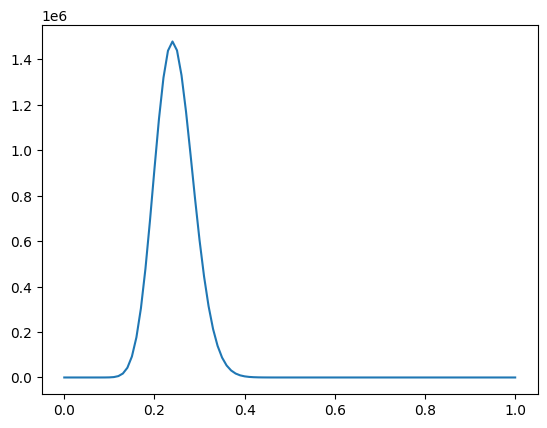

In [37]:
sns.lineplot(x=hypotheses, y=bfs)

In [47]:
import pandas as pd
df = pd.DataFrame(hypotheses)
df = pd.concat([df, pd.DataFrame(bfs)], axis=1)
df.columns = ["hypotheses", "BF"]

In [60]:
filt = df["BF"] == df["BF"].max()
df[filt]

,hypotheses,BF
24,0.24,1.478776e+06


In [66]:
df["priors"] = np.where((df["hypotheses"]>=0.2) & (df["hypotheses"]<=0.3),1/1000, 1)

In [67]:
df

,hypotheses,BF,priors
0,0.00,0.000000e+00,1.0
1,0.01,5.905740e-19,1.0
2,0.02,4.580377e-12,1.0
3,0.03,3.536401e-08,1.0
4,0.04,1.603441e-05,1.0
...,...,...,...
96,0.96,2.716868e-77,1.0
97,0.97,1.113619e-86,1.0
98,0.98,5.898004e-100,1.0
99,0.99,9.959654e-123,1.0


<Axes: ylabel='priors'>

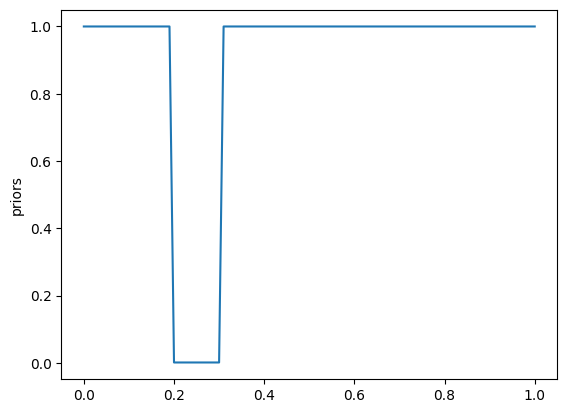

In [68]:
sns.lineplot(x=hypotheses, y=df["priors"])

In [69]:
df['posteriors'] = df["priors"]*df["BF"]

<Axes: xlabel='hypotheses', ylabel='posteriors'>

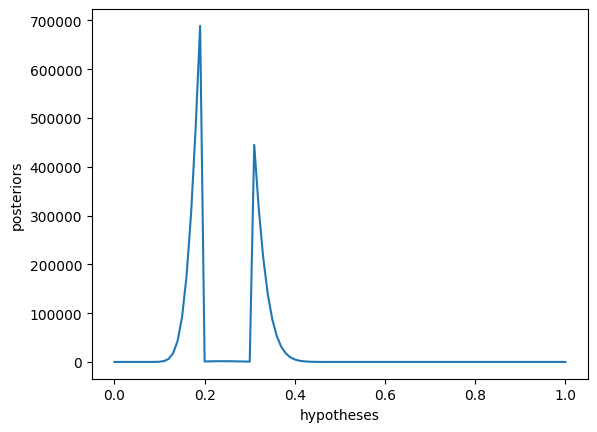

In [72]:
sns.lineplot(df, x='hypotheses', y='posteriors')

In [74]:
df["posteriors_normalized"] = df['posteriors']/df['posteriors'].sum()

In [77]:
df['posteriors_normalized'].sum()

0.9999999999999999

<Axes: xlabel='hypotheses', ylabel='posteriors_normalized'>

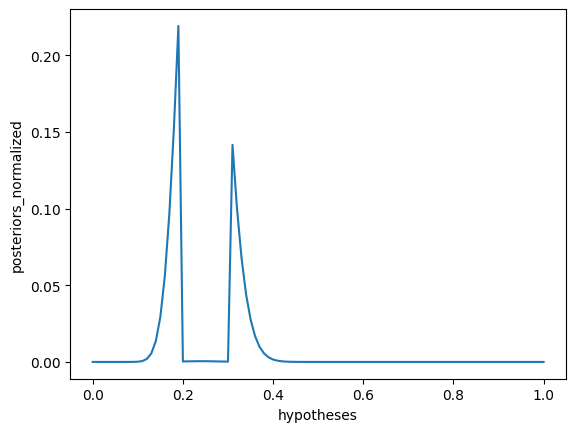

In [76]:
sns.lineplot(df, x='hypotheses', y='posteriors_normalized')

In [78]:
filt = df["hypotheses"] < 0.5
df[filt]["posteriors_normalized"].sum()

0.9999995179170431

In [82]:
np.sum(df['posteriors_normalized']*df['hypotheses'])

0.24027039578371662

In [85]:
# ex 1

In [87]:
bfs = compute_bayes_factor(h_top=hypotheses, h_bottom=0.24)

In [89]:
df = pd.DataFrame(hypotheses)
df = pd.concat([df, pd.DataFrame(bfs)], axis=1)
df.columns = ["hypotheses", "BF"]
df

,hypotheses,BF
0,0.00,0.000000e+00
1,0.01,3.993668e-25
2,0.02,3.097411e-18
3,0.03,2.391438e-14
4,0.04,1.084303e-11
...,...,...
96,0.96,1.837241e-83
97,0.97,7.530680e-93
98,0.98,3.988436e-106
99,0.99,6.735066e-129


<Axes: xlabel='hypotheses', ylabel='BF'>

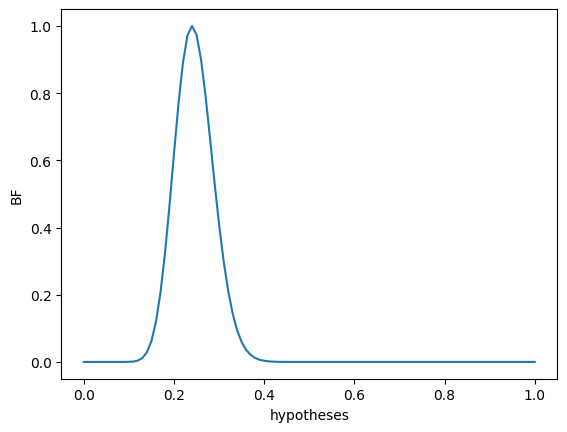

In [92]:
sns.lineplot(df, x="hypotheses", y="BF")

In [95]:
df["priors"] = np.where((df["hypotheses"]>=0.2) & (df["hypotheses"]<=0.3),1/1000, 1)
df['posteriors'] = df["priors"]*df["BF"]

In [96]:
df["posteriors_normalized"] = df['posteriors']/df['posteriors'].sum()

<Axes: xlabel='hypotheses', ylabel='posteriors_normalized'>

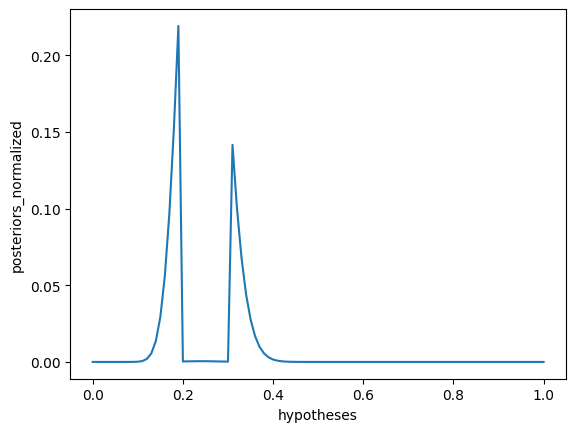

In [97]:
sns.lineplot(df, x="hypotheses", y="posteriors_normalized")

In [ ]:
result = 1*1.05
result_2 = result*1.05

1.05

In [112]:
# Ex2 
initial_value = 1
growth_rate = 1.05
num_values = 101

# Generate the vector
result_vector = pd.DataFrame(initial_value * np.cumprod(np.full(num_values, growth_rate)))
df = pd.concat([df, result_vector], axis=1)

In [115]:
df.columns = ['hypotheses', 'BF', 'priors', 'posteriors', 'posteriors_normalized', 'new_priors']

In [116]:
df['new_posteriors'] = df['BF']*df["new_priors"]

<Axes: xlabel='hypotheses', ylabel='new_posteriors'>

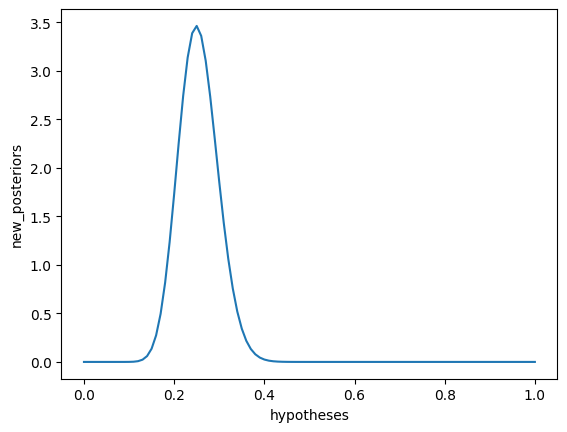

In [120]:
sns.lineplot(data=df, x="hypotheses", y='new_posteriors')

In [121]:
df

,hypotheses,BF,priors,posteriors,posteriors_normalized,new_priors,new_posteriors
0,0.00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.050000,0.000000e+00
1,0.01,3.993668e-25,1.0,3.993668e-25,1.880397e-25,1.102500,4.403019e-25
2,0.02,3.097411e-18,1.0,3.097411e-18,1.458399e-18,1.157625,3.585640e-18
3,0.03,2.391438e-14,1.0,2.391438e-14,1.125996e-14,1.215506,2.906808e-14
4,0.04,1.084303e-11,1.0,1.084303e-11,5.105383e-12,1.276282,1.383876e-11
...,...,...,...,...,...,...,...
96,0.96,1.837241e-83,1.0,1.837241e-83,8.650551e-84,113.595731,2.087027e-81
97,0.97,7.530680e-93,1.0,7.530680e-93,3.545780e-93,119.275517,8.982257e-91
98,0.98,3.988436e-106,1.0,3.988436e-106,1.877934e-106,125.239293,4.995090e-104
99,0.99,6.735066e-129,1.0,6.735066e-129,3.171170e-129,131.501258,8.856697e-127
